In [2]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=2)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

import torch
import glob
from collections import defaultdict

In [3]:
def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
           data[k].append(d[k]) 
        
    return data

In [13]:
exp155_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155*") 
exp155 = get_data(exp157_s01_files, "correct")

exp157_s01_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s01*") 
exp157_s01 = get_data(exp157_s01_files, "correct")

exp157_s02_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s02*") 
exp157_s02 = get_data(exp157_s02_files, "correct")

exp157_s05_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s05*") 
exp157_s05 = get_data(exp157_s05_files, "correct")

exp157_s06_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s06*") 
exp157_s06 = get_data(exp157_s06_files, "correct")

In [14]:
exp155

defaultdict(list,
            {'correct': [0.84,
              0.821,
              0.8092,
              0.1135,
              0.8286,
              0.8096,
              0.1135,
              0.8093,
              0.8313,
              0.8262,
              0.1135,
              0.6423,
              0.1135,
              0.8002,
              0.8201,
              0.5926,
              0.6654,
              0.8214,
              0.8117,
              0.821]})

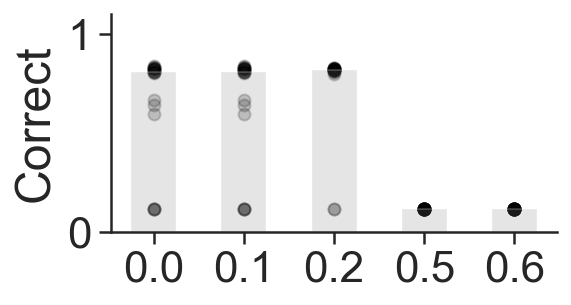

In [23]:
# Est stats
model_names = ["0.0","0.1", "0.2", "0.5", "0.6"]
models = [exp155, exp157_s01, exp157_s02, exp157_s05, exp157_s06]
medians = [
    np.median(exp155["correct"]), 
    np.median(exp157_s01["correct"]),
    np.median(exp157_s02["correct"]),
    np.median(exp157_s05["correct"]),
    np.median(exp157_s06["correct"]),
]

fig = plt.figure(figsize=(4, 2))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)

# Bar
plt.bar(model_names, medians, color="grey", alpha=0.2, width=0.5)

# Scatter
for name, model in zip(model_names, models):
    plt.scatter(x=np.repeat(name, 20), y=model["correct"], color="black", alpha=0.2)
# plt.xticks(np.array([0,1,3,4]), model_names)

# Etc
plt.ylim(0, 1.1)
plt.ylabel("Correct")
_ = sns.despine()